<a href="https://colab.research.google.com/github/napatsaha/westernsydney/blob/main/Group_4_PA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In our report, we will be comparing different methods of Linear Regression models to analyze a dataset about white wine quality and alcohol content.

The data analysis will be performed within the framework of the `sklearn` package.


The dataset contains physical information about different kinds of white wine. Our 2 main target variables are: the quality of the wine as rated by experts on a scale of 1-10 (for classification), and its alcohol content (for regression). The predicting features will be other physical and chemical properties such as pH, density, acidity, sugar content (10 in total).

The analysis can be split into 3 parts:


1.   Using **Simple Linear Regression** to predict alcohol content, comparing both explicit Gradient Descent and library-based solutions
2.   Using **Logistic Regression** to classify wine quality in both binary and multi-class classifications. Multi-class approaches will consider both One-Vs-All and One-vs-Rest.
3.   Using **Ridge Regression** to analyze important features affecting alcohol content. Cross-validated tuning will also be used to select the best hyperparameter





# Data Import and Preprocessing

The relevant scientific Python packages are imported here, including each function  separately from the various sklearn modules.

In order to import the data, we hosted our dataset on a public GitHub, for long-term remote access to the file. Alternatively, an option has also been provided which read the file in locally if it is available from the same directory. 

In [ ]:
#load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn.metrics

wine_local = "winequality-white.csv"
wine_url = "https://raw.githubusercontent.com/napatsaha/westernsydney/main/winequality-white.csv"

# If local file exists, use the local file, otherwise download from github link
if wine_local in os.listdir():
  wine_file = wine_local
else:
  wine_file = wine_url

#load dataset
wine=pd.read_csv(wine_file,delimiter=';')

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, Binarizer, binarize, KBinsDiscretizer
from sklearn.compose import TransformedTargetRegressor
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def reg_evalute(y_true,y_pred) :
    import sklearn.metrics
    mae=round(sklearn.metrics.mean_absolute_error(y_true, y_pred),4)
    print("The Mean Absolute error is :",mae)
    mse=round(sklearn.metrics.mean_squared_error(y_true, y_pred),4)
    print("The Mean Squared Error is:",mse)
    rmse=round(mse**(1/2),4)
    print("The Root Mean Squared Error is:",rmse)
    rsquared=round(sklearn.metrics.r2_score(y_true, y_pred),4)
    print("The R Square is:",rsquared)
    return mae,mse,rmse,rsquared

In [ ]:
# Check for any missing values
print("number of NA value is : \n",wine.isna().sum().sum())
print("number of NULL value is : \n ",wine.isnull().sum().sum())

number of NA value is : 
 0
number of NULL value is : 
  0


In [ ]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [ ]:
wine.corr()["quality"]

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

In [ ]:
wine["quality"].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

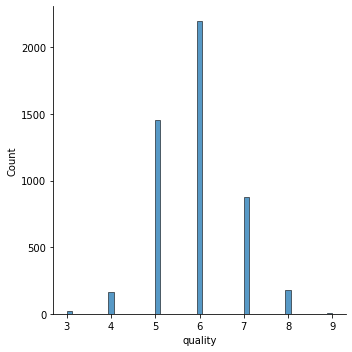

In [ ]:
sns.displot(wine['quality'])

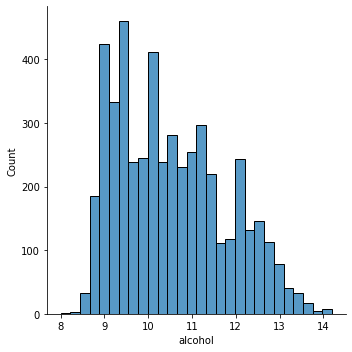

In [ ]:
sns.displot(wine['alcohol'])

Train Test Split

In [ ]:
# dataset-wide split for flexibility
class_train, class_test = train_test_split(wine, test_size=0.25, random_state=32) 
# Note: Put random_state=32 for any subsequent train_test_split for identical split result

#Question 1


Create a linear regression model to predict the alcohol level of each wine. 
    Use one part of the full data set as your training data to find the parameters of the model, and use the other part as test data to find the accuracy of the model. 

Use at least two different type of methods to find the parameters of your model. 

Hint: 
You will not need to use the quality variable for this model. 
You might want to use the train test What to submit splitfunction from scikit-learn to split your data set. 

• Write a brief description of your steps to create the model and your prediction. What did you do? Your description should include, but not limit to, answers to the following questions:

    – What is the accuracy of your model on the training data? What is the accuracy on the test data?
    – Is the model a good model? Why or why not?
    – Any particular choices you made or had to make in creating model or prediction? Why did you make them? 

• Submit your Python code as part of your report (Jupyter Notebook) or if your code is in a separate .py file, identify it’s GitHub location in your report.

## Method 1 : Sklearn

#### Dropping the quality variable

In [ ]:
# Train-test split (same random_state so same split result)
X = wine.drop(['alcohol', 'quality'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, wine.alcohol, train_size=0.75, random_state=32)

#### Initializing and implementing Linear Regression

In [ ]:
# Initialize pipeline to use standard scaler
lin_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])

# Train
lin_reg.fit(X_train, y_train);

In [ ]:
# Extract coefficients and intercepts
parameters = lin_reg['linreg'].coef_
intercept = lin_reg['linreg'].intercept_

#### Visualizing for a better understanding of the parameter


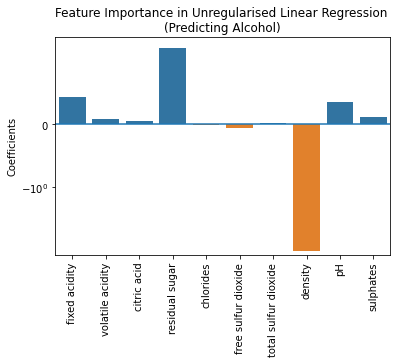

parameters: [ 0.43041267  0.09064553  0.04950321  1.21878255 -0.0060989  -0.06444636
  0.02350123 -2.06374008  0.35827292  0.11403941]
intercept: 10.511544604773594


In [ ]:
# Plotting coefficients
p = sns.barplot(x=X.columns, y=(parameters), hue=parameters < 0, dodge=False)
p.legend_.remove()
plt.axhline(0)
plt.yscale('symlog')
plt.ylabel("Coefficients")
# plt.ylim(min(parameters), max(parameters))
plt.xticks(rotation=90)
plt.title("Feature Importance in Unregularised Linear Regression \n(Predicting Alcohol)")
plt.show();

# Print coefficients
print("parameters:", parameters)
print("intercept:", intercept)

From the Graph above we now know that Residual suger, pH and fixed acidity have positive correaltion to alcohol.

#### Testing the accuracy

In [ ]:
# Evaluate test R2 score
test_score = lin_reg.score(X_test, y_test)
train_score = lin_reg.score(X_train, y_train)
print("Train Score:", train_score)
print("Test Score: ",test_score)



Train Score: 0.8607278839110443
Test Score:  0.897395875945502



### What is the accuracy of your model on the training data? What is the accuracy on the test data?

According to accuracy report:
- The training accuracy is 86.0%.
- The testing accuracy is 89.7%.


In [ ]:
y_prediction = lin_reg.predict(X_test)
metrics_11=pd.DataFrame({"actual":y_test, "prediction":y_prediction})
metrics_11.head()

,actual,prediction
4612,9.8,9.796376
1067,11.1,10.831201
231,9.6,9.564719
412,10.5,10.843449
2350,10.0,9.754895


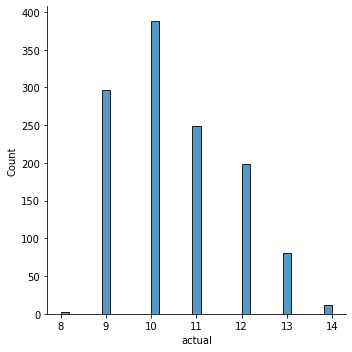

In [ ]:
sns.displot(round(metrics_11.iloc[:,0],0))

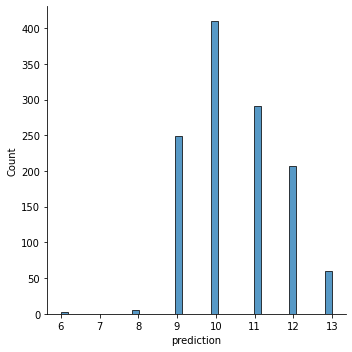

In [ ]:
sns.displot(round(metrics_11.iloc[:,1],0))


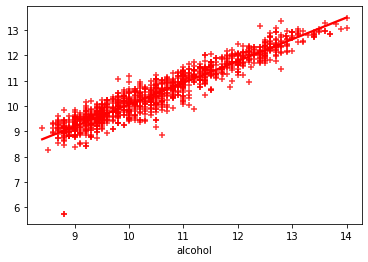

In [ ]:
sns.regplot(x=y_test,y=y_prediction,marker="+",color="red")

In [ ]:
# Evaluate training/test MSE score
mean_squared_error(y_test, y_prediction)

0.15705399686902294

In [ ]:
mean_squared_error(y_train, lin_reg.predict(X_train))

0.2101009956860673

In [ ]:
reg_evalute(y_test,y_prediction)

The Mean Absolute error is : 0.3015
The Mean Squared Error is: 0.1571
The Root Mean Squared Error is: 0.3964
The R Square is: 0.8974


(0.3015, 0.1571, 0.3964, 0.8974)

In [ ]:
regression_table=pd.DataFrame(columns=['Name','MAE','MSE','RMSE','Rsq'])
print(regression_table)
regression_table.loc["1"]=['sklearn_test',reg_evalute(y_test,y_prediction)[0],reg_evalute(y_test,y_prediction)[1],reg_evalute(y_test,y_prediction)[2],reg_evalute(y_test,y_prediction)[3]]
regression_table

Empty DataFrame
Columns: [Name, MAE, MSE, RMSE, Rsq]
Index: []
The Mean Absolute error is : 0.3015
The Mean Squared Error is: 0.1571
The Root Mean Squared Error is: 0.3964
The R Square is: 0.8974
The Mean Absolute error is : 0.3015
The Mean Squared Error is: 0.1571
The Root Mean Squared Error is: 0.3964
The R Square is: 0.8974
The Mean Absolute error is : 0.3015
The Mean Squared Error is: 0.1571
The Root Mean Squared Error is: 0.3964
The R Square is: 0.8974
The Mean Absolute error is : 0.3015
The Mean Squared Error is: 0.1571
The Root Mean Squared Error is: 0.3964
The R Square is: 0.8974


,Name,MAE,MSE,RMSE,Rsq
1,sklearn_test,0.3015,0.1571,0.3964,0.8974



### Is the model a good model? Why or why not?

With the mean squared error being 0.15, this means the value is closer to zero. It means that the model has a better quality of the estimator/predictor.
Thus making the model an optimal model.

### Any particular choices you made or had to make in creating model or prediction? Why did you make them?

No changes were made to the parameters during the model creation.



## Method 2 : gradient descent

In [ ]:
#standardise the data
# from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Only fit scaler to training data
X_transform = sc.fit_transform(X_train) # fit and return transformed values at the same time

# Append 1's to first column of X (for intercept)
X_ones = np.c_[np.ones((X_transform.shape[0], )), X_transform]


MSE Gradient:

$\nabla MSE = \frac{2}{N}*X^Τ ⋅ (X ⋅ w - y)$

Weight update algorithm:

$ w = w - η * ∇ MSE $

In [ ]:
## Helper Functions
# Calculate MSE loss
def loss_func(y,y_predicted):
  return ((y - y_predicted)**2).mean()

# Calculates yhat
def predict_y(weight,X):
  return X @ weight

# Calculates MSE gradient
def mse_gradient(X,y,y_predicted):
  n = X.shape[0]
  return (2/n) * X.T @ (y_predicted - y)

# Function for predicting new test data (include transformation by supplier fitted StandardScaler())
def predict(inputs, transformer, weights):

  inputs_transform = transformer.transform(inputs)
  inputs_ones = np.c_[np.ones((inputs_transform.shape[0], )), inputs_transform]

  return inputs_ones @ weights

In [ ]:
# gradient function
def gradient_descent(X,y, epoch = 2000, learning_rate = 0.01, tol=None):
    weight_vector = np.random.randn(X.shape[1])

    for i in range(int(epoch)):
        y_predicted = predict_y(weight_vector, X)
        weight_vector = weight_vector - learning_rate * mse_gradient(X,y,y_predicted) 
        loss = loss_func(y, y_predicted)
        if tol: 
          if loss < tol:
            print(f"Loss reached {loss} which is lower than threshold {tol}")
            break

    print(f"Total number of iterations done: {i}")
    return weight_vector

In [ ]:
# Begin optimization
# Higher learning rate leads to faster convergence for this example, so only a few number of iterations is required
w = gradient_descent(X_ones, y_train, tol=1e-4, epoch=200, learning_rate=0.1)

Total number of iterations done: 199


In [ ]:
# Weights obtained from GD
print(w)

[ 1.05115446e+01  4.24481052e-01  9.21432716e-02  5.02314723e-02
  1.19955303e+00 -9.97702721e-03 -6.17664375e-02  1.87207522e-02
 -2.04186063e+00  3.53662482e-01  1.12951636e-01]


In [ ]:
# Comparison
# Weights obtained from sklearn.LinearRegression()
w_sk = np.insert(parameters, 0, intercept)
print(w_sk)

[ 1.05115446e+01  4.30412667e-01  9.06455346e-02  4.95032073e-02
  1.21878255e+00 -6.09890408e-03 -6.44463607e-02  2.35012327e-02
 -2.06374008e+00  3.58272922e-01  1.14039411e-01]


In [ ]:
# Test evaluation
predict(X_test, sc, w)

array([ 9.80659101, 10.83253809,  9.56572671, ..., 12.92068945,
       11.58654132,  8.83439385])

#### Evaluating the gradient descent model

In [ ]:
# Training loss (MSE)
loss_func(y_train, predict(X_train, sc, w))

0.2101860489519867

In [ ]:
# Test data Loss (MSE)
loss_func(y_test, predict(X_test, sc, w))

0.15778466457774135

### What is the accuracy of your model on the training data? What is the accuracy of the test data? 

Mean squared error is 0.15705399686902294.

### Is the model a good model? Why or why not? 

With the mean squared error being 0.15, this means the value is closer to zero. It means that the model has a better quality of the estimator/predictor.


### Any particular choices you made or had to make in creating a model or prediction? Why did you make them? 

No changes were made to the parameters during the model creation.

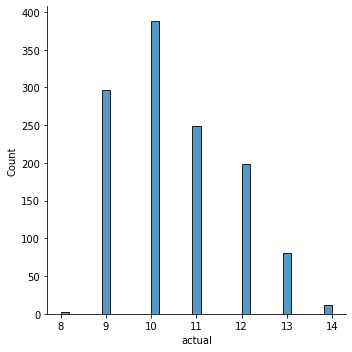

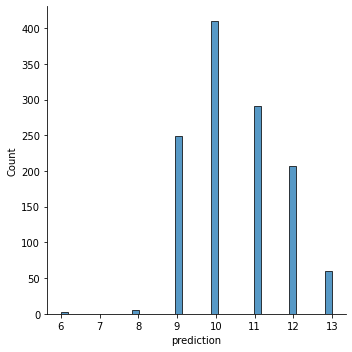

In [ ]:
metrics_12=pd.DataFrame({"actual":y_test, "prediction":y_prediction})
metrics_12.head()

sns.displot(round(metrics_12.iloc[:,0],0))
sns.displot(round(metrics_12.iloc[:,1],0))



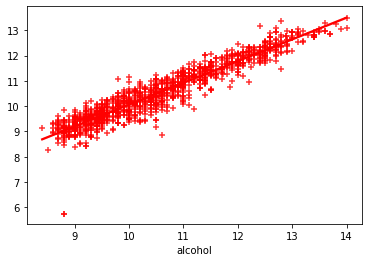

In [ ]:
sns.regplot(x=y_test,y=y_prediction,marker="+",color="red")

# Question 2  
###Sina Ehtejab


#### A description of what you did to preprocess the data.

#### What alternative options for preprocessing did you consider (if any)?



## Binary Classification - Pre processing 

#### Using the already existing train and test set from question where
we have columns such as below

In [ ]:
class_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Dropping the Quality varible from the input sets, X train and X test
and adding quality to Y_train and Y_test since it will be used to 
for predication.

In [ ]:
X_train = class_train.drop(['quality'], axis='columns')
y_train = class_train.quality

X_test = class_test.drop(['quality'], axis='columns')
y_test = class_test.quality

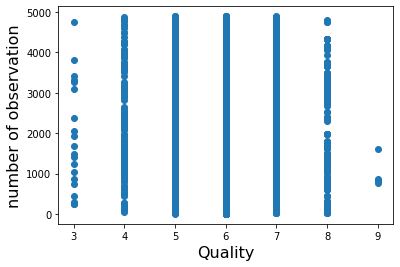

In [ ]:
n=range(0,len(wine.quality))
plt.scatter(wine.quality,n)
plt.xlabel("Quality", fontsize=16)
plt.ylabel("number of observation", rotation=90, fontsize=16)
plt.show()


Plot shows recorded quality indecies, an indication that we have
wines with quality level of 5,6,7.
or more precisely in below where we have 

In [ ]:
wine.quality.value_counts().sort_index(ascending=True)

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

In this classification task, we will consider predicting wine quality using the other 11 features. The quality variable is an ordinal feature with labels ranging from 1-10, represneting rating. This classification task can be approached by treating all 10 labels as separate classes, or as only a binary variable for a certain threshold (e.g. 5), or in fact any number of classes in between. Since logistic regression is inherently a binary classifier, multi-class classification need to extend the algorithm. The two common approaches are One-vs-Rest and One-vs-One.

## **Binary Classification**

Here we will treat the target as having only two categories (binary), using 5 as a cut-off (this is an arbitrary choice, though one that makes the most sense).

This can be accomplished by using the imported `binarize` function from `sklearn` library. Initialy the code `((y_train > 5.0).sum())`, was being used, where it required extra steps in order filter out the rest of data. Whereas Binzarize function is meant for this very purpose and no extra steps are needed.

In [ ]:
# Binarize labels
y_train_binary = binarize(pd.DataFrame(y_train), threshold=5.0).reshape(-1)
y_test_binary = binarize(pd.DataFrame(y_test), threshold=5.0).reshape(-1)
print(y_train_binary.shape,"y train")
print(y_test_binary.shape,'y test')

# y_train_binary.sum(), (y_train > 5.0).sum()
y_sampl=(y_train > 5.0).sum()
y_sampl=y_sampl.astype(int)
y_sampl.shape

(3673,) y train
(1225,) y test


()

In [ ]:
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# logreg_binary = TransformedTargetRegressor(regressor=pipe2, transformer=Binarizer(threshold=5.0))

In [ ]:
pipe2.fit(X_train, y_train_binary)

Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])


#### Accuracy of your training and testing model


In [ ]:
pipe2.score(X_test, y_test_binary)
pipe2.score(X_test, y_test_binary)

0.7395918367346939

## Multi-Class (All classes)

One-vs-Rest (OVR)

The parameters of Logistic Regression support implementing an ovr classification, so this can be included within the pipeline itself.

In [ ]:
# 
pipe2_multi = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class='ovr'))
])

pipe2_multi.fit(X_train, y_train)
pipe2_multi.score(X_test, y_test)

0.5404081632653062

#### One-Vs-Rest

Alternatively, we can use the specialised function OneVsRestClassifier to achieve the same result

In [ ]:
ovr_clf = OneVsRestClassifier(pipe2)
ovr_clf.fit(X_train, y_train)
ovr_clf.score(X_test, y_test)

0.5404081632653062


#### Accuracy of your training and testing model


#### One-Vs-One

Similarly we can use the OneVsOneClassifier to perform OVO classification  

In [ ]:
ovo_clf = OneVsOneClassifier(pipe2)
ovo_clf.fit(X_train, y_train)
ovo_clf.score(X_test, y_test)

0.5281632653061225


#### Accuracy of your training and testing model


There seems to not be a large difference between the two approaches for all 10 classes classification of wine quality

## Multi-Class (k-class)

We can also consider an arbitrary number of classes in-between the binary and complete classes scenarios. This way we might be able to find the best number of classes.

To do this in sklearn, we rely on the KBinDiscretizer to arbitrarily split the classes into k groups. In this case, we specify that each group should have the same distance apart (e.g. 2-4, 4-6).

In [ ]:
max_cat = y_train.nunique()

results_kclass = pd.DataFrame(index=pd.RangeIndex(start=2, stop=max_cat+1), columns=['ovr','ovo'])

multi_func = {'ovr':OneVsRestClassifier,
              'ovo':OneVsOneClassifier}

for k in results_kclass.index:
  splitter = KBinsDiscretizer(n_bins=k, strategy='uniform', encode='ordinal')
  y_trans_train = splitter.fit_transform(pd.DataFrame(y_train)).reshape(-1)
  y_trans_test = splitter.transform(pd.DataFrame(y_test)).reshape(-1)
  for kind, classifier in multi_func.items():
    clf = classifier(pipe2)
    print(f'Fitting {kind} for {k} classes')
    clf.fit(X_train, y_trans_train)
    results_kclass.loc[k, kind] = clf.score(X_test, y_trans_test)

results_kclass

Fitting ovr for 2 classes
Fitting ovo for 2 classes
Fitting ovr for 3 classes
Fitting ovo for 3 classes
Fitting ovr for 4 classes
Fitting ovo for 4 classes
Fitting ovr for 5 classes
Fitting ovo for 5 classes
Fitting ovr for 6 classes
Fitting ovo for 6 classes
Fitting ovr for 7 classes
Fitting ovo for 7 classes


,ovr,ovo
2,0.739592,0.739592
3,0.773061,0.768163
4,0.684898,0.681633
5,0.540408,0.526531
6,0.540408,0.528163
7,0.540408,0.528163


Text(0.5, 1.0, 'Logistic Regression (Predicting Quality)')

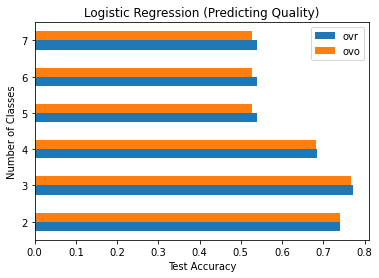

In [ ]:
results_kclass.plot(kind='barh', ylabel='Accuracy', xlabel='Number of Classes')
plt.xlabel("Test Accuracy")
plt.title("Logistic Regression (Predicting Quality)")

In [ ]:
  splitter = KBinsDiscretizer(n_bins=3, strategy='uniform', encode='ordinal')
  ytrans = splitter.fit_transform(pd.DataFrame(y_train)).reshape(-1)
  # # np.unique(ytrans, return_counts=True)
  # clf = OneVsRestClassifier(pipe2)
  # clf.fit(X_train, ytrans)

In [ ]:
cc = pd.DataFrame(y_train.unique()).sort_values(0)
np.hstack([cc.values, splitter.transform(cc)]).astype('int')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KBinsDiscretizer was fitted with feature names
  "X does not have valid feature names, but"


array([[3, 0],
       [4, 0],
       [5, 1],
       [6, 1],
       [7, 2],
       [8, 2],
       [9, 2]])


#### Accuracy of your training and testing model


# **Conclusion**
Optimal Number of classes to split by is **3 classes**, split at uniform range.

One-Vs-Rest performs consistently better than One-Vs-One, although by only a small margin.


**Advantages for Logistic regression :**
* Does not cost a high compuation power 
* Easy to use and to interpert the results

**Disadvantages for Logistic regression :**
 

*    Great chance of overfitting, which users should avoid of by performing trial and error
*    Does not support non-linear problems
*  Low support of large set of categorical factors

 


# Question 3 

**Napat**

### Create a Ridge regression model to predict alcohol content (as in Question 1). What to submit 

#### • Submit your Python code as part of your report or if you have separate Python code (.py files), write in your report what they are called and where to find them on GitHub. 


### Write a brief description of your steps to create your model, including but not limited to the following:
The Ridge Regression model to predict alcohol content is built using sklearn pipelines features. 
At first X an Y training and testing set are made.
After which a pipeline is formualted using standard scalar and ridge regression model.

In [ ]:
# Assign predictor and target variables (alcohol) for training and testing data
X_train = class_train.drop(['quality', 'alcohol'], axis='columns')
X_test = class_test.drop(['quality', 'alcohol'], axis='columns')
y_train = class_train.alcohol
y_test = class_test.alcohol

### Creating Pipeline

In [ ]:
# A pipeline that consists of a standard scaler and Ridge Regression
pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', Ridge())
])

##### Accuracy of your model on the training and test data?



### Train Result: Default hyperparameters

In [ ]:
# Fit using default Ridge()
pipe3.fit(X_train, y_train)
y_pred = pipe3.predict(X_test)


# Evaluate using R2 and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R^2 : {r2}\nMSE : {mse}')

R^2 : 0.8972859142758354
MSE : 0.1572223129078047


##### Tuning the hyperparameter



### Finding most important features

In [ ]:
# Number of alphas to iterate over
n_alphas = 200
alphas = np.logspace(-1,5, n_alphas) # create n number alphas on a log scale base 10
coefs = np.empty((n_alphas, X_train.columns.size)) # empty container

# Fit, extract and store model weights for each alpha
for i, a in enumerate(alphas):
  pipe3.set_params(reg__alpha=a, reg__fit_intercept=False) # set to current alpha
  pipe3.fit(X_train, y_train)
  coefs[i, :] = pipe3.named_steps.reg.coef_ # Extract weights and store to row i


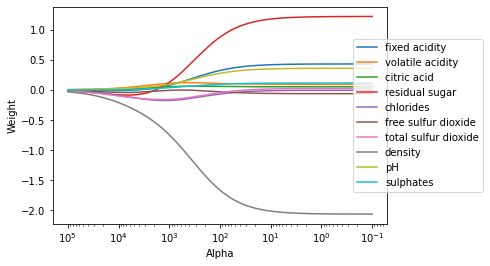

In [ ]:
# Plot
ax = plt.gca() # gca -- get current axis

ax.plot(alphas, coefs)
ax.set_xscale('log') # Log-scale alpha
ax.set_xlim(ax.get_xlim()[::-1]) # Reverse x-axis
ax.set_xlabel("Alpha")
ax.set_ylabel("Weight")
# Set Legend to column names
ax.legend(X_train.columns, bbox_to_anchor=(1.3,0.5), loc='right', fontsize=10)

plt.show();

In [ ]:
## Show which variable has the highest absolute weights

# Turn coefs to data frame for easy naming
coefs_df = pd.DataFrame(coefs, index=alphas, columns=X_train.columns)
# Find the maximum absolute values of weight for each predictor, then pick the highest 2
coefs_df.apply(lambda x: np.max(np.abs(x)), axis='rows').sort_values(ascending=False).head(2)

density           2.063222
residual sugar    1.218334
dtype: float64

As the regularisation plot and the summary result above shows, the features with the highest predictive power to `Alcohol`:
1. `Density` (Negatively correlated: lower density, higher alcohol)
2. `Residual Sugar` (Positively correlated: higher sugar, higher alcohol)

### Hyperparameter Tuning

In [ ]:
# Parameters to search over
param_grid = {
    'reg__alpha':alphas, # same list of alphas
    'reg__fit_intercept':[True, False], # whether to fit intercept or not
    'reg__solver':['svd', 'cholesky', 'saga'] # only 3 solvers chosen for performance
    # 'reg__solver':['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}
grid = GridSearchCV(pipe3, param_grid=param_grid, cv=3)

In [ ]:
# Perform grid search
grid.fit(X_train, y_train);

In [ ]:
# Best hyper-parameters found
grid.best_params_

In [ ]:
# Best Cross-Validation score
grid.best_score_

In [ ]:
# Evaluate on test set
y_pred = grid.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R^2 : {r2}\nMSE : {mse}')

Compared with the default hyperparameters, tuning the model barely made any difference to the performance on the test set.

##### What’s the difference between the two models?